In [16]:
import diy21cm as d21
import os
from datetime import datetime
import json_io as json
import numpy as np, matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
# to generate gifs
import imageio

In [2]:
# Get default parameters
param = d21.getDefaultParams()

In [3]:
# Load all the exposures
pathOut = "./output/20250525"

In [4]:
# Load all the "exposure_on" output files
# Extract and sort the filenames, excluding 'latest_exposure_on'
outputFileNames = sorted([
    f for f in os.listdir(pathOut)
    if f.endswith('.json') and 'exposure_on' in f and 'latest_exposure' not in f
])
# print(outputFileNames)

outputFiles = [json.loadJson(pathOut+'/'+outputFileName) for outputFileName in outputFileNames]

In [5]:
# Function to convert timestamp in the filename to a datetime object
def extract_time_from_filename(filename):
    try:
        # Extract the date and time part from the filename (e.g., 20250525_5h38m29s)
        timestamp_str = filename.split('_')[0] + '_' + filename.split('_')[1]
        
        # Format: 'YYYYMMDD_HHhMMmSSs' -> '20250525_5h38m29s'
        # Convert to a datetime object
        timestamp = datetime.strptime(timestamp_str, '%Y%m%d_%Hh%Mm%Ss')
        
        # Convert to seconds since epoch (Unix timestamp)
        return timestamp.timestamp()
    except ValueError as e:
        print(f"Skipping file {filename} due to invalid timestamp: {e}")
        return None  # Return None if timestamp parsing fails

# Get an array of times (seconds since epoch), excluding invalid ones
timestamps = [extract_time_from_filename(f) for f in outputFileNames]
timestamps = [t for t in timestamps if t is not None]  # Filter out None values

print("Exposure timestamps in minutes, setting the first one as t=0")
print((np.array(timestamps)-timestamps[0]) / 60.)

Exposure timestamps in minutes, setting the first one as t=0
[  0.          10.28333333  17.15        24.03333333  30.91666667
  37.81666667  44.68333333  51.58333333  58.45        72.21666667
  79.1         85.98333333  92.86666667  99.76666667 106.65
 113.55        65.33333333 134.21666667 120.41666667 141.1
 148.         154.86666667 161.76666667 168.65       175.55
 127.31666667 189.33333333 196.23333333 203.13333333 210.05
 216.91666667 223.81666667 182.45       230.7        237.58333333
 251.36666667 258.25       265.08333333 244.46666667]


In [6]:
FOn = np.array([outputFile['fOn'] for outputFile in outputFiles])
POn = np.array([outputFile['pOn'] for outputFile in outputFiles])
POnOverRef = np.array([outputFiles[i]['pOn']/POn[0,:] for i in range(len(outputFiles))])

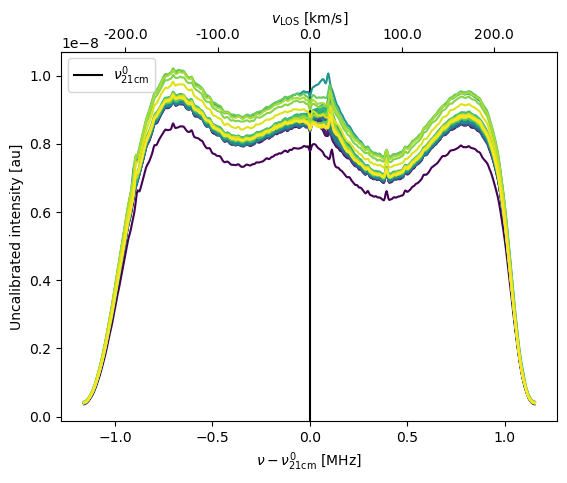

In [7]:
fig, ax, ax2 = d21.plot(FOn, POn)

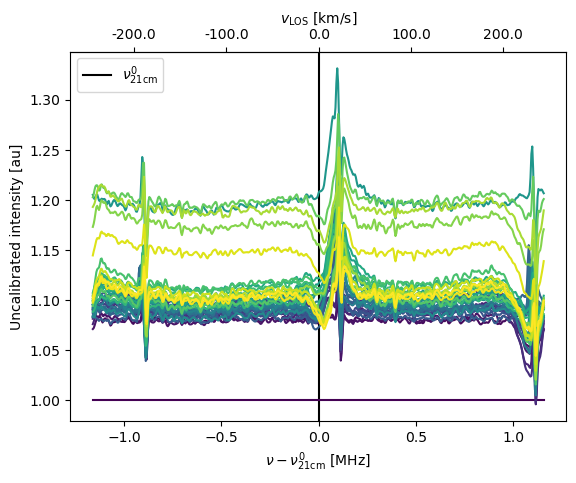

In [8]:
fig, ax, ax2 = d21.plot(FOn, POnOverRef)

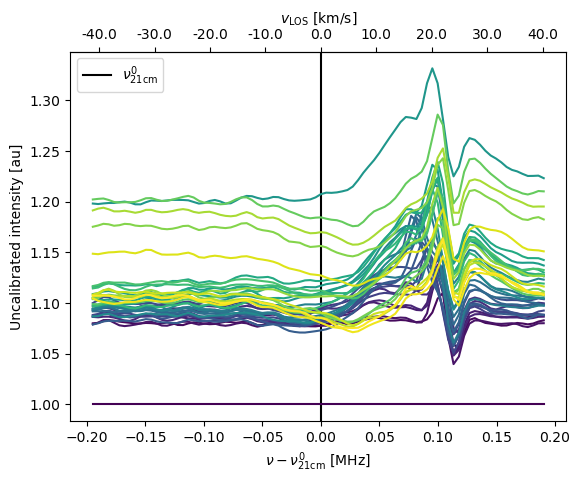

In [9]:
nF = len(FOn[0,:])
frac = 2.4
nLim = int(nF//frac)
fig, ax, ax2 = d21.plot(FOn[:,nLim:-nLim], POnOverRef[:,nLim:-nLim])

In [10]:
# Load all the "exposure_on" output files
# Extract and sort the filenames, excluding 'latest_exposure_on'
outputFileHotNames = sorted([
    f for f in os.listdir(pathOut)
    if f.endswith('.json') and 'exposure_hot' in f and 'latest_exposure' not in f
])
print(outputFileHotNames)

outputFilesHot = [json.loadJson(pathOut+'/'+outputFileHotName) for outputFileHotName in outputFileHotNames]

FOnHot = np.array([outputFileHot['fOn'] for outputFileHot in outputFilesHot])
POnHot = np.array([outputFileHot['pOn'] for outputFileHot in outputFilesHot])

['20250525_01h26m54s_exposure_hot_300sec_ra4.515313189328917_dec52.56034071111111.json']


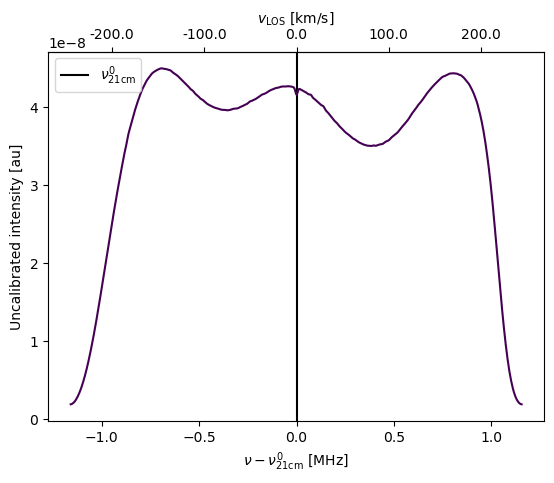

In [11]:
fig, ax, ax2 = d21.plot(FOnHot, POnHot)

In [12]:
POnOverHot = np.array([outputFiles[i]['pOn']/POnHot[0,:] for i in range(len(outputFiles))])

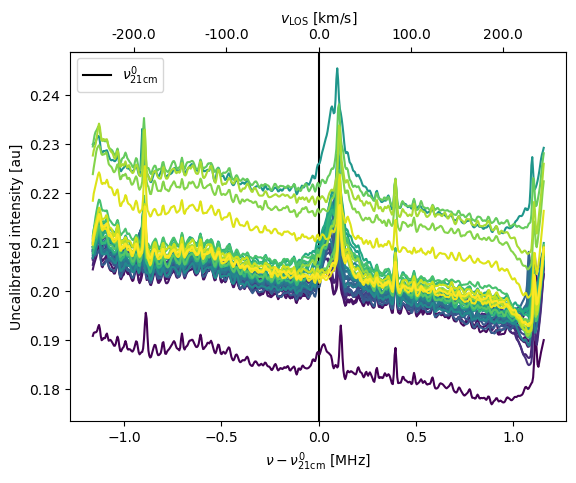

In [13]:
fig, ax, ax2 = d21.plot(FOn, POnOverHot)

In [22]:
POnOverHotRenormMean = np.array([POnOverHot[i][:] / np.mean(POnOverHot[i][:int(len(FOn[0,:])//2 - 10)], axis=-1) - 1. for i in range(len(outputFiles))])

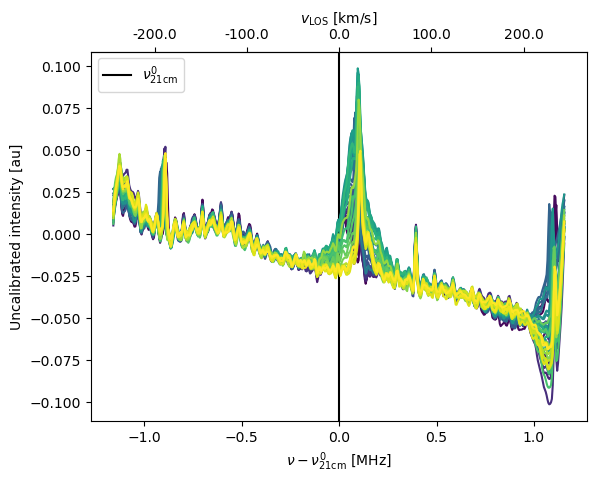

In [33]:
fig, ax, ax2 = d21.plot(FOn, POnOverHotRenormMean)

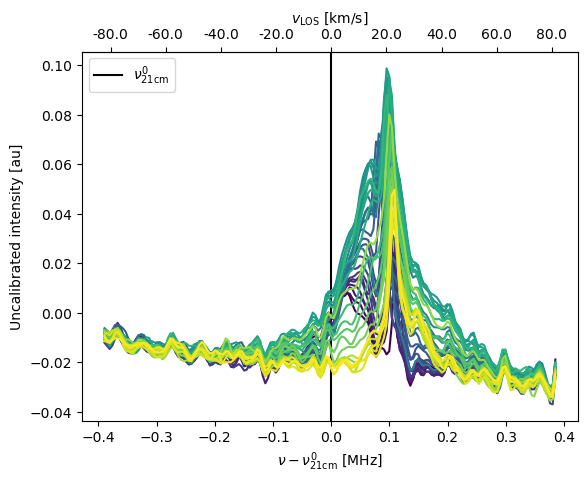

In [30]:
nF = len(FOn[0,:])
frac = 3.
nLim = int(nF//frac)

fig, ax, ax2 = d21.plot(FOn[:,nLim:-nLim], POnOverHotRenormMean[:,nLim:-nLim])

In [34]:
# Function to generate individual plots
def generate_plots(FOn, POnOverHotRenormMean, output_dir="temp_plots"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # List to store file names of each generated plot
    plot_files = []
    
    # Loop through the data and create a plot for each element
    for i, (f, p) in enumerate(zip(FOn, POnOverHotRenormMean)):
        fig, ax, ax2 = d21.plot(f, p)
        ax.set_title(f"Plot {i+1}")
        
        # Save the plot as an image
        plot_file = os.path.join(output_dir, f"plot_{i+1}.png")
        plt.savefig(plot_file)
        plot_files.append(plot_file)
        plt.close(fig)  # Close the figure to free up memory
    
    return plot_files

# Function to create a GIF from the saved plot images
def create_gif(plot_files, gif_name="output.gif", duration=0.5):
    with imageio.get_writer(gif_name, mode='I', duration=duration) as writer:
        for plot_file in plot_files:
            image = imageio.imread(plot_file)
            writer.append_data(image)
    
    # Optionally: Clean up the temporary images
    for plot_file in plot_files:
        os.remove(plot_file)


# Generate plots and create a GIF
plot_files = generate_plots(FOn[:,nLim:-nLim], POnOverHotRenormMean[:,nLim:-nLim])
create_gif(plot_files, gif_name="output.gif", duration=0.5)

print("GIF created successfully!")

/tmp/ipykernel_57000/1263767668.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(plot_file)


GIF created successfully!
